In [69]:
#import pachages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
# improt dataset
path = "C:/Users/Bruna/OneDrive/Documentos/curso-python/data-analysis/"
file = "ramen-rating-cleaned.csv"
df=pd.read_csv(path+file,sep=',')
df

,Unnamed: 0,Review,Brand,Variety,Style,Country,Stars
0,0,2580,new touch,t's restaurant tantanmen,cup,japan,3.75
1,1,2579,just way,noodles spicy hot sesame spicy hot sesame guan...,pack,taiwan,1.00
2,2,2578,nissin,cup noodles chicken vegetable,cup,usa,2.25
3,3,2577,wei lih,gge ramen snack tomato flavor,pack,taiwan,2.75
4,4,2576,ching's secret,singapore curry,pack,india,3.75
...,...,...,...,...,...,...,...
2572,2575,5,vifon,"hu tiu nam vang [""phnom penh"" style] asian sty...",bowl,vietnam,3.50
2573,2576,4,wai wai,oriental style instant noodles,pack,thailand,1.00
2574,2577,3,wai wai,tom yum shrimp,pack,thailand,2.00
2575,2578,2,wai wai,tom yum chili flavor,pack,thailand,2.00


In [7]:
# exclude Unnamed column
df = df.loc[:, df.columns!='Unnamed: 0']

# General insights

In [10]:
# general insights

df.describe(include='all')
# There are 353 brands, nissin is the most reviewed one with 381 reviews
# There are 2403 variety (flavors) of ramen, and chicken was reviewd 8x and it is the most reviewed 
# There are 7 different pasta styles and the most reviewed one is "pack" with 1530 reviews
# There are 38 countries between the reviews and 352 reviews are from Japan
# the mean os the stars is 3.6, the minimum is 0 the maximum is 5

,Review,Brand,Variety,Style,Country,Stars
count,2577.000000,2577,2577,2577,2577,2577.000000
unique,NaN,353,2403,7,38,NaN
top,NaN,nissin,chicken,pack,japan,NaN
freq,NaN,381,8,1530,352,NaN
mean,1289.443927,NaN,NaN,NaN,NaN,3.654676
std,744.569010,NaN,NaN,NaN,NaN,1.015331
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,645.000000,NaN,NaN,NaN,NaN,3.250000
50%,1289.000000,NaN,NaN,NaN,NaN,3.750000
75%,1934.000000,NaN,NaN,NaN,NaN,4.250000


In [16]:
# Does all the reviewers give stars to ramen?
# I can't tell, I don't know if the app allows you to give 0 stars or if you don't put stars then count as 0
df[df['Stars']==0]

,Review,Brand,Variety,Style,Country,Stars
52,2527,uni-president,mushroom flavor,pack,vietnam,0.0
76,2503,sichuan guangyou,sweet potato instant noodle sout-hot flavor,bowl,china,0.0
152,2426,dr. mcdougall's,vegan pad thai noodle soup,cup,usa,0.0
291,2287,master kong,artificial abalone crab flavor instant noodle,pack,china,0.0
370,2208,roland,ramen japanese style quick-cooking alimentary ...,pack,usa,0.0
475,2103,roland,ramen japanese style quick-cooking alimentary ...,pack,usa,0.0
522,2056,koyo,garlic pepper reduced sodium ramen,pack,usa,0.0
555,2023,urban noodle,authentic street food black bean,cup,uk,0.0
561,2017,samyang foods,honey & cheese big bowl,bowl,south korea,0.0
622,1956,maruchan,spicy tomato salsa ramen,cup,japan,0.0


In [18]:
# Nissin is by far the most popular one
df['Brand'].value_counts()

nissin                381
mama                   98
nongshim               98
maruchan               76
paldo                  66
                     ... 
gge                     1
good tto leu foods      1
nan hsing               1
springlife              1
choumama                1
Name: Brand, Length: 353, dtype: int64

In [19]:
# there is no flavor REALLY popular
df['Variety'].value_counts()

chicken                                         8
beef                                            7
instant noodles chicken flavour                 6
yakisoba                                        6
artificial chicken                              6
                                               ..
demae ramen black garlic oil tonkotsu           1
gge noodle snack wheat crackers hot spicy       1
penang favourite white curry rice vermicelli    1
sweet & spicy                                   1
sllrrrp! kari berapi                            1
Name: Variety, Length: 2403, dtype: int64

In [21]:
# Pack is by far the most popular
df['Style'].value_counts()

pack    1530
bowl     481
cup      450
tray     108
box        6
bar        1
can        1
Name: Style, dtype: int64

In [24]:
# Considering the size os japan we can say he eat A LOT of ramen 
df['Country'].value_counts()

japan            352
usa              323
south korea      307
taiwan           224
thailand         191
china            169
malaysia         155
hong kong        137
indonesia        126
singapore        109
vietnam          108
uk                69
philippines       47
canada            41
india             31
germany           27
mexico            25
australia         22
netherlands       15
nepal             14
myanmar           14
hungary            9
pakistan           9
bangladesh         7
colombia           6
cambodia           5
brazil             5
poland             4
holland            4
fiji               4
sweden             3
dubai              3
finland            3
sarawak            3
estonia            2
ghana              2
nigeria            1
united states      1
Name: Country, dtype: int64

In [28]:
# what is the most eaten pack style?
df[df['Style']=='pack'].describe(include='all')
# Almost half of the "pack" reviews are from nissin 

,Review,Brand,Variety,Style,Country,Stars
count,1530.000000,1530,1530,1530,1530,1530.000000
unique,NaN,254,1460,1,38,NaN
top,NaN,nissin,chicken,pack,taiwan,NaN
freq,NaN,121,7,1530,182,NaN
mean,1256.152941,NaN,NaN,NaN,NaN,3.700033
std,734.807866,NaN,NaN,NaN,NaN,0.982352
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,641.500000,NaN,NaN,NaN,NaN,3.250000
50%,1276.500000,NaN,NaN,NaN,NaN,3.750000
75%,1850.750000,NaN,NaN,NaN,NaN,4.250000


# Nissin is popular

In [49]:
# People like nissin?
nissin = df[df['Brand']=='nissin']
nissin

,Review,Brand,Variety,Style,Country,Stars
2,2578,nissin,cup noodles chicken vegetable,cup,usa,2.25
13,2567,nissin,deka buto kimchi pork flavor,bowl,japan,4.50
14,2566,nissin,demae ramen bar noodle aka tonkotsu flavour in...,pack,hong kong,5.00
20,2560,nissin,cup noodles laksa flavour,cup,hong kong,4.25
27,2553,nissin,hakata ramen noodle white tonkotsu,bowl,japan,4.75
...,...,...,...,...,...,...
2550,27,nissin,demae ramen curry flavor,pack,japan,4.00
2551,26,nissin,soba noodles with mayo mustard squirt,pack,japan,4.00
2552,25,nissin,demae ramen spicy flavor,pack,japan,3.00
2553,24,nissin,demae ramen spicy seafood with chili pepper,pack,japan,2.00


In [50]:
nissin['Stars'].value_counts()

4.000    82
5.000    76
3.500    53
3.750    48
3.000    29
4.500    22
3.250    20
4.250    12
4.750    10
2.750     7
2.500     7
2.000     4
2.250     3
1.750     3
1.500     2
4.300     1
2.125     1
3.800     1
Name: Stars, dtype: int64

In [101]:
# Promoters 'nissin'
good_nissin = nissin[nissin['Stars']>4]
# 121 reviews are from promoters

In [102]:
good_nissin

,Review,Brand,Variety,Style,Country,Stars
13,2567,nissin,deka buto kimchi pork flavor,bowl,japan,4.50
14,2566,nissin,demae ramen bar noodle aka tonkotsu flavour in...,pack,hong kong,5.00
20,2560,nissin,cup noodles laksa flavour,cup,hong kong,4.25
27,2553,nissin,hakata ramen noodle white tonkotsu,bowl,japan,4.75
31,2549,nissin,gekikara ramen extra hot ramen goreng,pack,indonesia,4.50
...,...,...,...,...,...,...
2333,244,nissin,karashi mayo yakisoba,tray,japan,4.75
2435,142,nissin,chow mein teriyaki beef,tray,usa,4.50
2453,124,nissin,yakisoba with mayonnaise/mustard packet,tray,japan,5.00
2549,28,nissin,chikin ramen,pack,japan,5.00


In [99]:
# Neutral reviews nissin
neutro_nissin = nissin[(nissin['Stars']<=4) & (nissin['Stars']>2)]
# 251 reviews are from neutral consumers

In [100]:
neutro_nissin

,Review,Brand,Variety,Style,Country,Stars
2,2578,nissin,cup noodles chicken vegetable,cup,usa,2.25
40,2539,nissin,demae iccho tonkotsu flavour instant noodle,cup,hong kong,3.75
81,2498,nissin,demae ramen spicy beef,pack,germany,3.75
82,2497,nissin,cup noodles spicy,cup,germany,3.75
84,2495,nissin,cup noodles huhn (chicken),cup,germany,3.75
...,...,...,...,...,...,...
2512,65,nissin,top ramen oriental,pack,usa,2.50
2514,63,nissin,souper meal chicken flavor with vegetable medley,bowl,japan,3.00
2550,27,nissin,demae ramen curry flavor,pack,japan,4.00
2551,26,nissin,soba noodles with mayo mustard squirt,pack,japan,4.00


In [96]:
# Bad reviews
bad_nissin = nissin[nissin['Stars']<=2]
# only 9 reviews are bad 

In [97]:
bad_nissin

,Review,Brand,Variety,Style,Country,Stars
1334,1243,nissin,demae rice vermicelli chicken flavour instant ...,pack,hong kong,1.75
2314,263,nissin,chow mein kung pao chicken,tray,usa,1.50
2381,196,nissin,cup noodles pani puri,cup,india,1.50
2394,183,nissin,bowl noodles hot & spicy chicken,bowl,usa,2.00
2420,157,nissin,sotanghon,cup,philippines,2.00
2423,154,nissin,creamy chicken,cup,usa,1.75
2440,137,nissin,bowl noodles rich & savory chicken,bowl,usa,1.75
2494,83,nissin,demae ramen spicy flavor,pack,japan,2.00
2553,24,nissin,demae ramen spicy seafood with chili pepper,pack,japan,2.00


In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Style',data=nissin.sort_values('Style',ascending=False))
plt.xticks(rotation=45)
plt.savefig('nissin style')

plt.show()

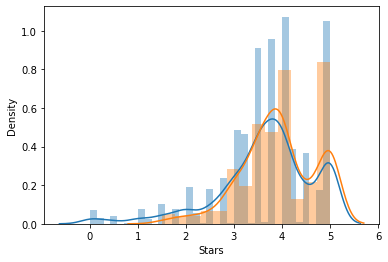

In [104]:
sns.distplot(df['Stars'])
sns.distplot(nissin['Stars'])
#plt.xticks(rotation=90)
plt.savefig('Rates')
plt.show()
# most used rates are between 3 - 4 and 5 stars  

# Word clouds

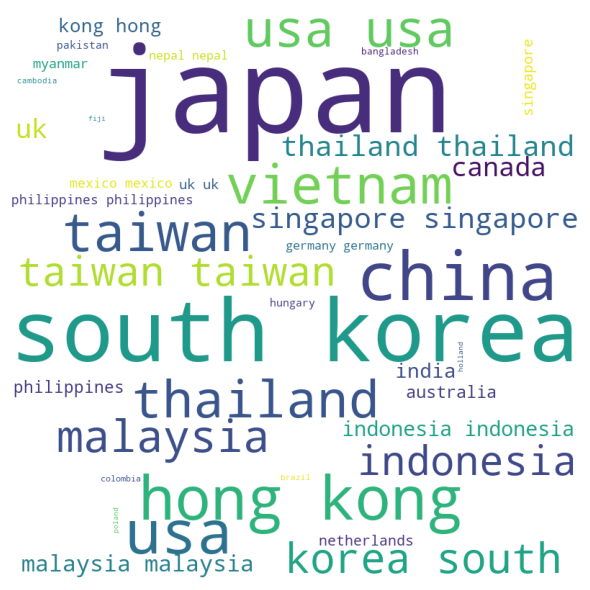

In [73]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['Country']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('Word Cloud')

plt.show()

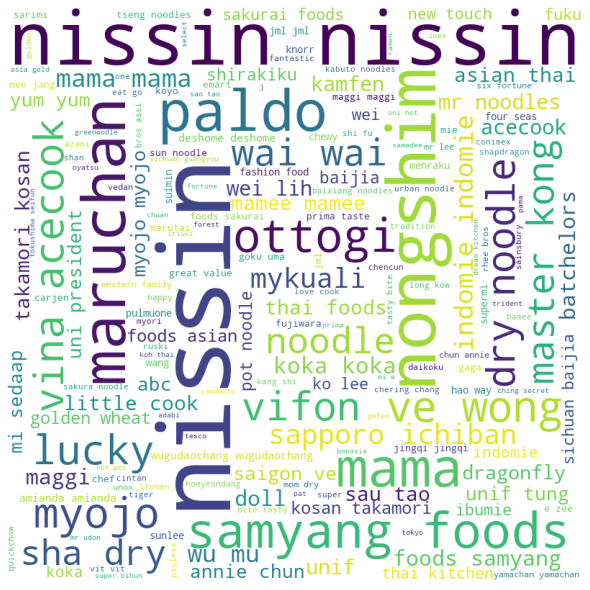

In [76]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['Brand']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('Word Cloud Brand')

plt.show()

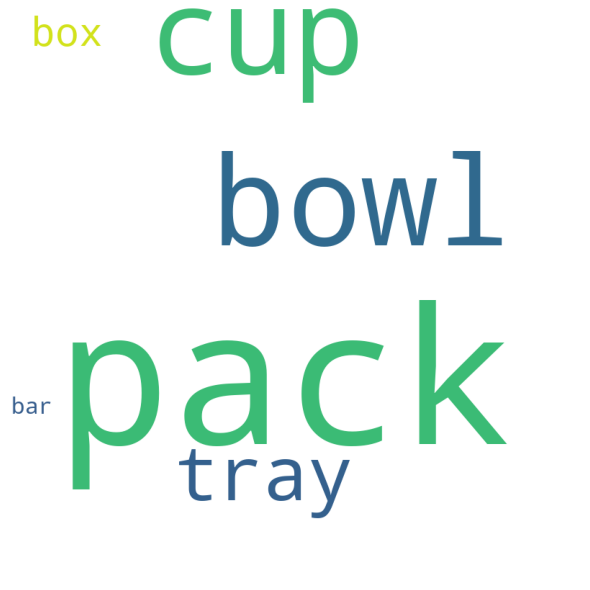

In [77]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['Style']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('Word Cloud style')

plt.show()

# Package Style

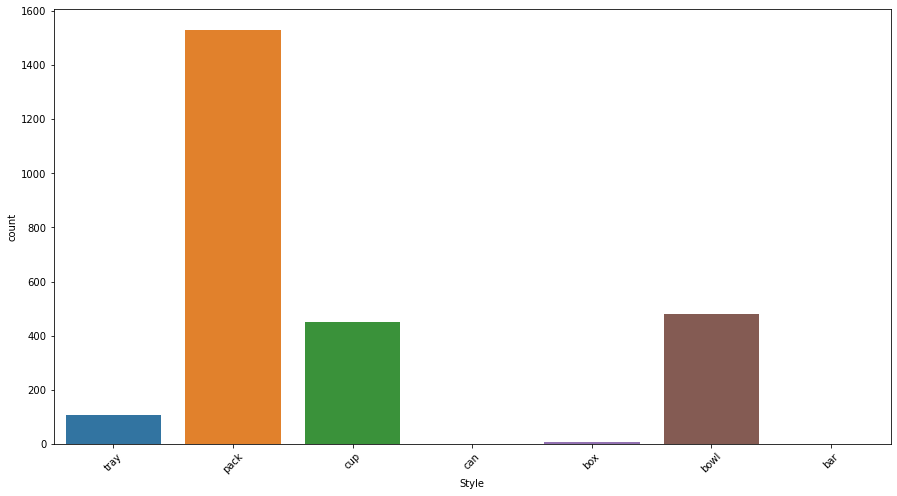

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(x='Style',data=df.sort_values('Style',ascending=False))
plt.xticks(rotation=45)
plt.savefig('all ramen style')
plt.show()

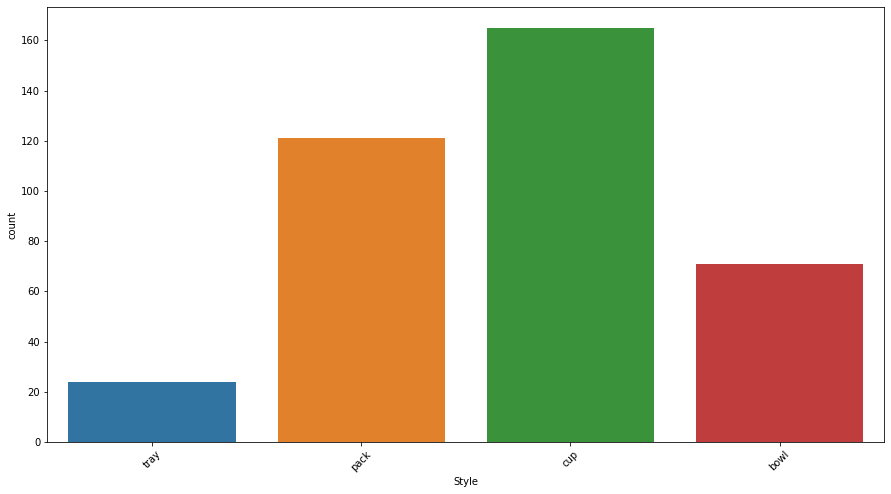

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(x='Style',data=nissin.sort_values('Style',ascending=False))
plt.xticks(rotation=45)
plt.savefig('nissin style')

plt.show()